In [2]:
# from IPython.display import HTML, display

# display(HTML("""
# <style>
# /* ============================
#    1) MODE NOTEBOOK BIASA
#    ============================ */

# /* Markdown di tampilan notebook */
# .jp-RenderedHTMLCommon,
# .jp-MarkdownOutput {
#     font-size: 18px !important;
#     font-family: "Noto Sans", "Open Sans", sans-serif !important;
#     line-height: 1.6 !important;
# }

# /* Heading markdown di notebook */
# .jp-RenderedHTMLCommon h1 { font-size: 28px !important; }
# .jp-RenderedHTMLCommon h2 { font-size: 24px !important; }
# .jp-RenderedHTMLCommon h3 { font-size: 20px !important; }

# /* ============================
#    2) MODE PRESENTASI (RISE / reveal.js)
#    ============================ */

# /* Ukuran dasar font di slide */
# .reveal,
# .reveal .slides section {
#     font-size: 36px !important;  /* atur besar kecil di sini */
#     font-family: "Noto Sans", "Open Sans", sans-serif !important;
#     line-height: 1.6 !important;
# }

# /* Paragraf & list di slide */
# .reveal p,
# .reveal li {
#     font-size: 1em !important;   /* relatif ke 26px di atas */
# }

# /* Heading di slide */
# .reveal h1 { 
#     font-size: 1.8em !important;   /* ~46px kalau base 26px */
#     font-weight: bold !important;
# }
# .reveal h2 { font-size: 1.4em !important; }
# .reveal h3 { font-size: 1.2em !important; }

# /* Optional: kode di slide */
# .reveal code,
# .reveal pre {
#     font-size: 0.85em !important;  /* sedikit lebih kecil dari teks biasa */
#     font-family: "JetBrains Mono", "Fira Code", monospace !important;
# }
# </style>
# """))

# Optimasi dengan Gradient Descent

Algoritma Gradient Descent adalah metode optimasi yang digunakan untuk mencari nilai minimum dari suatu fungsi. Fungsi yang ingin dioptimalkan dapat mewakili kesalahan model dalam konteks machine learning atau fungsi biaya dalam berbagai masalah optimisasi. Prinsip dasar algoritma ini adalah iteratif menuruni "lembah" fungsi menuju nilai minimum dengan mengikuti arah turunan fungsi tersebut.

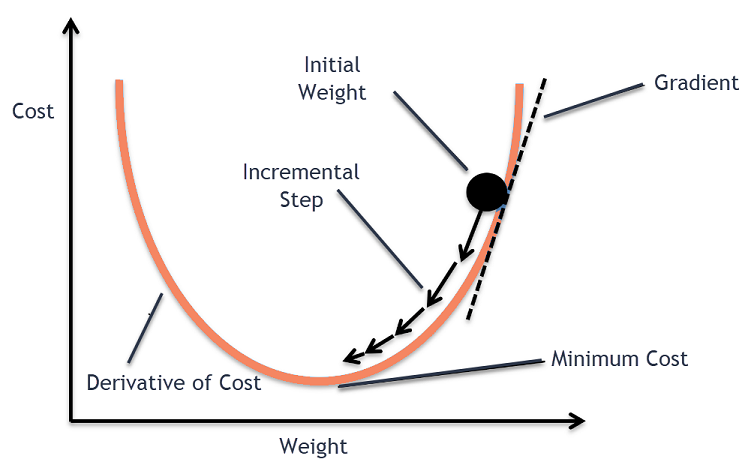

### $$y^{n+1}=y^{n}-\eta \nabla J$$


In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def loss(theta):
    return (theta - 3)**2
def gradient(theta):
    return 2 * (theta - 3)

In [33]:
# Gradient descent function
def gradient_descent(theta_init, learning_rate, epochs):
    thetas = [theta_init]
    for _ in range(epochs):
        grad = gradient(thetas[-1])
        new_theta = thetas[-1] - learning_rate * grad
        thetas.append(new_theta)
    return thetas

In [34]:
# def loss(theta):
#     return np.sin(theta)*theta**2
# def gradient(theta):
#     return 2*theta*np.sin(theta) + theta**2 * np.cos(theta)

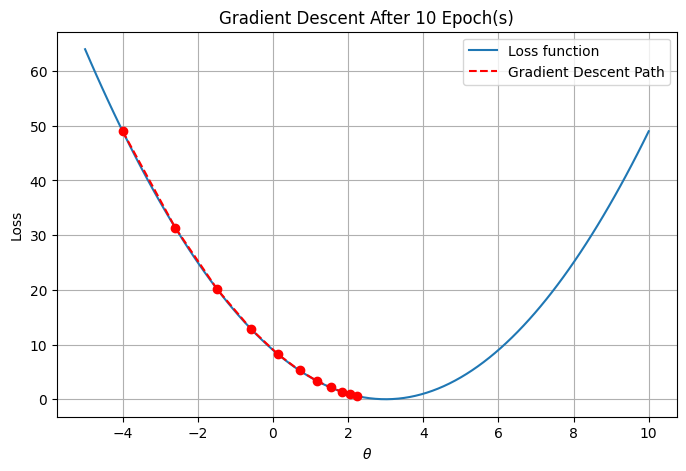

In [35]:
theta_init = -4  # titik awal
lr = 0.1
epochs = 10
# Jalankan gradient descent untuk epochs tertentu
thetas = gradient_descent(theta_init, lr, epochs)

theta_vals = np.linspace(-5, 10, 100)
loss_vals = loss(theta_vals)

plt.figure(figsize=(8,5))
plt.plot(theta_vals, loss_vals, label='Loss function')
plt.scatter(thetas, [loss(t) for t in thetas], color='red', zorder=5)
plt.plot(thetas, [loss(t) for t in thetas], color='red', linestyle='--', label='Gradient Descent Path')
plt.title(f"Gradient Descent After {epochs} Epoch(s)")
plt.xlabel(r"$\theta$")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


## Regresi Linier dengan Gradient Descent 

In [36]:
import pandas as pd

df = pd.read_csv("/home/aliefhisyam/MyProjectPy/Data/housingdata.csv")
df.head()

,size,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


Secara umum, regresi linier itu
menggunakan optimasi nilai $y=mx+b$ terhadap $y_{eks}$

$S = \frac{1}{n}\sum_i^n (y-y_{eks})^2$

dan dengan prinsip optimasi 

$\frac{\partial S}{\partial m} = 0$

$\frac{\partial S}{\partial b} = 0$

didapatkan paramater saat nilai $S$ optimal

$m = \frac{N\sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2-(\sum x_i)^2}$
dan 
$b = \frac{\sum x^2_i y_i - \sum x_i \sum x_i y_i}{N\sum x_i^2-(\sum x_i)^2}$


masalah ini dipecahkan melalui optimasi

In [37]:
X = df["size"]
Y = df['price']

model regresi $f = \theta_0+ x \theta_1$ dengan $\theta_1$ adalah m atau grad , dan $\theta_0$ adalah intercept

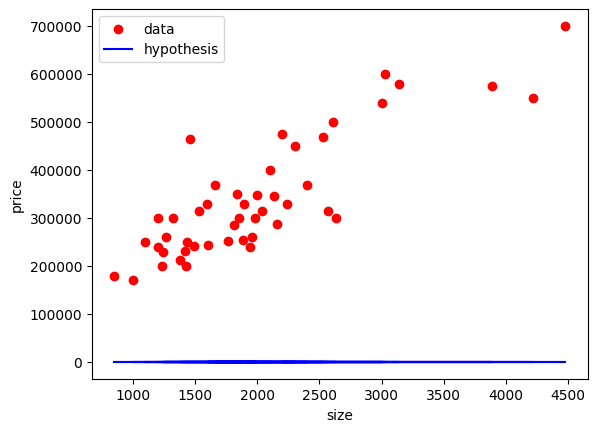

In [38]:
epochs = 0

f = lambda x: theta_0 + theta_1 *x

theta_0 = 0
theta_1 = 0

plt.scatter(X,Y,c='r',label='data')
plt.plot(X,f(Y),c='b',label='hypothesis')
plt.xlabel('size')
plt.ylabel('price')
plt.legend()

fungsi loos

$J = \frac{1}{2m}\sum (\hat{y}-Y)^2$

$\hat{y}$ adalah model teori/ ML

$Y$ adalah data

dan $m$ adalah panjang data

In [39]:
m = len(X)

y_hat = f(X)
def cost(Y):
  return 1/(2*m)*np.sum((y_hat-Y)**2)

J = cost(Y)

In [40]:
#hasil disimpan
J_history = []
J_history.append(J)

## Gradient Descent 

$
\theta := \theta - \eta \cdot \frac{d\mathcal{L}}{d\theta}
$

dengan $\mathcal{L}=f=  \theta_0+ x \theta_1$


sehingga 

$
\theta_0 := \theta_0 - \eta \cdot \frac{d\mathcal{L}}{d\theta_0}
$

$
\theta_1 := \theta_1 - \eta \cdot \frac{d\mathcal{L}}{d\theta_1}
$

In [41]:
def pd_theta_0(Y): # turunan terhadap theta 0
    return (1 / m) * np.sum(y_hat - Y)

def pd_theta_1(X, Y):# turunan terhadap theta 1
    return (1 / m) * np.sum((y_hat - Y) @ X) # @ adalah perkalian di numpy

In [42]:
J_history = []
y_hat_history = []

theta_0, theta_1 = 0, 0  # Inisialisasi parameter
alpha_0, alpha_1 = 0.09, 0.00000008 # Learning rate

for i in range(1, 20):
    # Hitung gradien
    theta_0_temp = pd_theta_0(Y)
    theta_1_temp = pd_theta_1(X, Y)

    # Update parameter
    theta_0 -= alpha_0 * theta_0_temp
    theta_1 -= alpha_1 * theta_1_temp

    # Hitung prediksi dan biaya
    y_hat = f(X)
    J = cost(Y)

    J_history.append(J)
    y_hat_history.append(y_hat.copy())  # Simpan prediksi


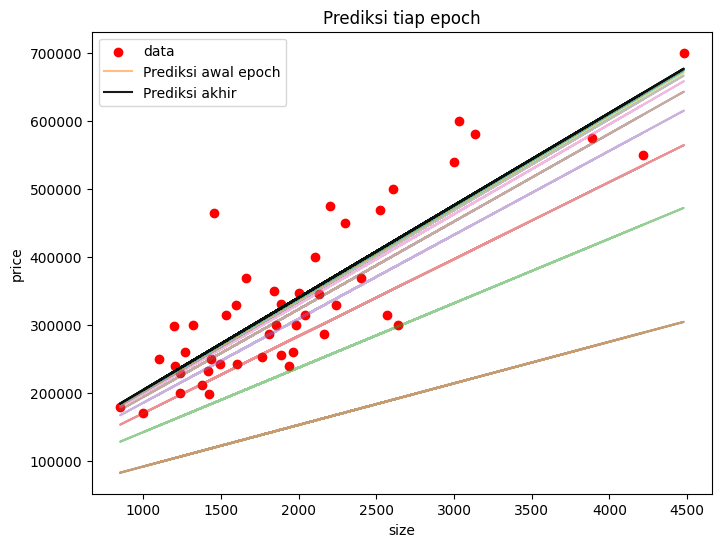

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, c='r', label='data')

# Loop untuk plot semua prediksi
for i, y_hat in enumerate(y_hat_history):
    plt.plot(X, y_hat, alpha=0.5)
    if i == 0:
        plt.plot(X, y_hat, label='Prediksi awal epoch', alpha=0.5)
    if i == len(y_hat_history) - 1:
        plt.plot(X, y_hat, label='Prediksi akhir', alpha=0.9, color='black')

plt.xlabel('size')
plt.ylabel('price')
plt.title('Prediksi tiap epoch')
plt.legend()
plt.show()


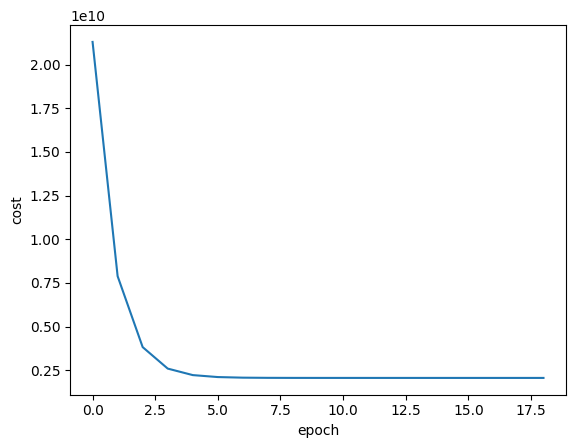

In [44]:
plt.plot(J_history)# plot fungsi loss
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [45]:
J_history[-1]

np.float64(2058611636.8702068)

## Gradient Descent untuk Catenary Problem

Catenary Problem adalah (``"catena"``=rantai) masalah matematika untuk menemukan kurva yang dibentuk oleh kabel atau rantai yang tergantung bebas di antara dua titik, hanya di bawah pengaruh gravitasinya sendiri. Masalah ini pertama kali diajukan pada tahun 1690 oleh Jacob Bernoulli, dan kurva yang dihasilkan dikenal sebagai kurva katenari, yang memiliki persamaan matematika spesifik, yaitu $y=a\cosh (x/a)$. Dalam kode ini, masalah catenary akan diselesaikan berdasarkan prinsip gradient descent untuk meminimumkan energi sistem nya

dalam Lagrangian Multiplier

$F = E(y)+\lambda (l(y)-L)$ 

dan prinsip variasi memberikan jika energi minimum 

##### $\frac{\delta F}{\delta y}=\frac{\delta}{\delta}(E(y)+\lambda (l(y)-L))=0$

##### $\frac{\delta E(y)}{\delta y}+\lambda \frac{\delta l(y)}{\delta y}=0$

kemudian tambahkan gradient descent nya

##### $y^{n+1}(x) = y^{n}(x)- \eta (\frac{\delta E(y)}{\delta y}+\lambda \frac{\delta l(y)}{\delta y})$  

ambil $\eta=dt$ sehingga ungkapan diatas bisa juga

##### $\frac{\partial y}{\partial t}= (\frac{\delta E(y)}{\delta y}+\lambda \frac{\delta l(y)}{\delta y})$  


In [46]:
rho_g = 1.0
x1, x2 = -10.0, 10.0
n_points = 200
x = np.linspace(x1, x2, n_points)
dx = x[1] - x[0]

L = 30.0          # panjang tali yang diinginkan
y_left = 5.0
y_right = 2.0

dt = 1e-3         # time step gradient flow
n_steps = 5000
clip_y = 50.0


definisikan panjang tali

$l[y]=\int_{x_1}^{x_2} \sqrt{1+y(x)'^2}dx$

In [47]:
def length_curve(y):
    y_prime = np.gradient(y, dx)
    return np.sum(np.sqrt(1.0 + y_prime**2)) * dx


Energi potensial talu

$E[y]=\int \rho g y \sqrt{1+y'^2}dx$ 

In [48]:
def energy_E(y):
    y_prime = np.gradient(y, dx)
    s = np.sqrt(1.0 + y_prime**2)
    return np.sum(rho_g * y * s) * dx


kemudian turunan fungsionalnya

- untuk persamaan tali

#### $\frac{\delta l}{\delta y}=-\frac{d}{dx}\frac{y'}{\sqrt{1+y^2}}$

- untuk persamaan energi

##### $\frac{\delta E}{\delta y}=\rho g \sqrt{1+y'^2}-\frac{d}{dx}(\rho g \frac{yy'}{\sqrt{1+y'^2}})$

dengan aturan variasi 

$\delta E_1=\delta E_n=0$

$\delta l_1=\delta l_n=0$

In [49]:
def functional_derivatives(y):
    y_prime = np.gradient(y, dx)
    s = np.sqrt(1.0 + y_prime**2)

    # tali
    qL = y_prime / s
    deltaL = -np.gradient(qL, dx)

    # energi
    term_y  = rho_g * s
    term_yp = rho_g * y * y_prime / s
    deltaE = term_y - np.gradient(term_yp, dx)

    # boundary fix
    deltaE[0] = deltaE[-1] = 0.0
    deltaL[0] = deltaL[-1] = 0.0
    return deltaE, deltaL

<div style="display: flex; gap: 10px;">

<div style="flex: 1; background-color: #f5f5f5; padding: 10px;">
<h3>Inisiasi awal</h3>
<p>
menebak bentuk awal dari tali dengan cara 

$y = y_0 - A \cdot \text{mode}(x)$

$y_0$ adalah sebuah garis lurus dan mode ini adalah sebuah fungsi yang 

akan dipilih sedemikian rupa agar 

$ y_\text{trial}(x_1) = y_\text{trial}(x_2)$

dan fungsi yang dipilih disini adalah fungsi sin karena 

$\sin(0)=\sin(\pi)$

dan juga fungsi sin ini bisa divariasikan tekukan pada talinya 

sehingga fungsi nya 

$\text{mode}(x) = \sin{2\pi m} \iff m = \frac{x-x_1}{x_2-x_1}$


</p>
</div>

<div style="flex: 1; background-color: #eee; padding: 10px;">
<h3>Code</h3>

```python
from scipy.optimize import brentq

def make_initial_y_with_length():
    #tebakan garis
    y_lin = np.linspace(y_left, y_right, n_points)
    
    #tebakan sinusoidal
    s_param = (x - x1) / (x2 - x1)
    mode = np.sin(np.pi * s_param)

    # tebakan fungsi panjang
    def length_diff(A):
        y_trial = y_lin - A * mode
        return length_curve(y_trial) - L

    #loop untuk menemukan interval bracketing A 
    diff0 = length_diff(0.0)

    #referensi nilai A tinggi
    A_hi = 0.1
    for _ in range(40):
        diff_hi = length_diff(A_hi)
        if diff0 * diff_hi < 0:
            break
        A_hi *= 2.0
    else:
        raise RuntimeError("Gagal bracket A")

    # cari A yang tepat dinterval tersebut
    A_opt = brentq(length_diff, 0.0, A_hi)
    y0 = y_lin - A_opt * mode
    y0[0] = y_left
    y0[-1] = y_right
    return y0

y = make_initial_y_with_length()
print("Panjang awal (=L):", length_curve(y))

```

In [50]:
from scipy.optimize import brentq

def make_initial_y_with_length():
    #tebakan garis
    y_lin = np.linspace(y_left, y_right, n_points)
    
    #tebakan sinusoidal
    s_param = (x - x1) / (x2 - x1)
    mode = np.sin(np.pi * s_param)

    # tebakan fungsi panjang
    def length_diff(A):
        y_trial = y_lin - A * mode
        return length_curve(y_trial) - L

    #loop untuk menemukan interval bracketing A 
    diff0 = length_diff(0.0)

    #referensi nilai A tinggi
    A_hi = 0.1
    for _ in range(40):
        diff_hi = length_diff(A_hi)
        if diff0 * diff_hi < 0:
            break
        A_hi *= 2.0
    else:
        raise RuntimeError("Gagal bracket A")

    # cari A yang tepat dinterval tersebut
    A_opt = brentq(length_diff, 0.0, A_hi)
    y0 = y_lin - A_opt * mode
    y0[0] = y_left
    y0[-1] = y_right
    return y0

y = make_initial_y_with_length()
print("Panjang awal (=L):", length_curve(y))


Panjang awal (=L): 30.000000000000004


Syarat agar tali tetap konstan saat melorot, batasi bahwa

$\frac{dl}{dt}=0$

dan gunakan 

$\frac{dl}{dt}=\int \frac{\delta l}{\delta y}\frac{\partial y}{\partial t}dx$

gunakan nilai $\frac{\partial y}{\partial t}$ dari gradient descent sebelumnya dan didapatkan nilai 

$\lambda = - \frac{\int \delta l \delta E dx}{(\delta l)^2 dx}$

kemudian kondisi step numerik bisa merubah panjang sedikit sehingga butuh koreksi panjang 

$y^{n+1} = y^{n} - \alpha \frac{\delta l}{\delta y}$

dengan 

$\alpha = \frac{l[y]-L}{\int (\delta l)^2 dx}$


<div style="display: flex; gap: 10px;">

<div style="flex: 1; background-color: #f5f5f5; padding: 10px;">
<h3>Syarat tali konstan</h3>
<p>Syarat agar tali tetap konstan saat melorot, batasi bahwa

$\frac{dl}{dt}=0$

dan gunakan 

$\frac{dl}{dt}=\int \frac{\delta l}{\delta y}\frac{\partial y}{\partial t}dx$

gunakan nilai $\frac{\partial y}{\partial t}$ dari gradient descent sebelumnya dan 

didapatkan nilai 

$\lambda = - \frac{\int \delta l \delta E dx}{(\delta l)^2 dx}$

<h3>Koreksi Numerik panjang tali</h3>
kemudian kondisi step numerik bisa merubah 

panjang sedikit 
sehingga butuh koreksi panjang 

$y^{n+1} = y^{n} - \alpha \frac{\delta l}{\delta y}$

dengan 

$\alpha = \frac{l[y]-L}{\int (\delta l)^2 dx}$

kemudian batas atas-bawah tali 
$$
\begin{cases}
a_{min} & \text{jika } a < a_{min} \\
a & \text{jika }  a_{min} \ge x \le a_{max} \\
a_{max} & \text{jika } a > a_{max}
\end{cases}
$$
</p>
</div>

<div style="flex: 1; background-color: #eee; padding: 10px;">
<h3>Code</h3>

```python
history_E = []
history_L = []
history_lambda = []

for step in range(n_steps):
    deltaE, deltaL = functional_derivatives(y)

    # syarat tali tetap L
    num = np.sum(deltaL * deltaE) * dx
    den = np.sum(deltaL**2) * dx
    lamb = -num / den if den > 1e-12 else 0.0

    # gradient descent step
    dy_dt = -(deltaE + lamb * deltaL)# lagrange multiplier
    dy_dt[0] = dy_dt[-1] = 0.0# boundary condition fixed
    y += dt * dy_dt

    # projection: koreksi panjang supaya ℓ[y] ≈ L
    cur_L = length_curve(y)
    diffL = cur_L - L
    if abs(diffL) > 1e-6 and den > 1e-12:
        # pakai deltaL yang barusan (aproksimasi)
        alpha = diffL / den
        y -= alpha * deltaL
        y[0] = y_left
        y[-1] = y_right
        cur_L = length_curve(y)

    # guardrail & boundary (filter nilai y supaya tidak melampaui batas)
    y = np.clip(y, -clip_y, clip_y)
    y[0] = y_left
    y[-1] = y_right

    E_val = energy_E(y)
    history_E.append(E_val)
    history_L.append(cur_L)
    history_lambda.append(lamb)

    if step % 500 == 0 or step == n_steps-1:
        print(f"step {step:4d} | E = {E_val:10.4f} | L = {cur_L:8.4f} | lambda = {lamb: .4e}")
```



In [51]:
history_E = []
history_L = []
history_lambda = []

for step in range(n_steps):
    deltaE, deltaL = functional_derivatives(y)

    # syarat tali tetap L
    num = np.sum(deltaL * deltaE) * dx
    den = np.sum(deltaL**2) * dx
    lamb = -num / den if den > 1e-12 else 0.0

    # gradient descent step
    dy_dt = -(deltaE + lamb * deltaL)# lagrange multiplier
    dy_dt[0] = dy_dt[-1] = 0.0# boundary condition fixed
    y += dt * dy_dt

    # projection: koreksi panjang supaya ℓ[y] ≈ L
    cur_L = length_curve(y)
    diffL = cur_L - L
    if abs(diffL) > 1e-6 and den > 1e-12:
        # pakai deltaL yang barusan (aproksimasi)
        alpha = diffL / den
        y -= alpha * deltaL
        y[0] = y_left
        y[-1] = y_right
        cur_L = length_curve(y)

    # guardrail & boundary (filter nilai y supaya tidak melampaui batas)
    y = np.clip(y, -clip_y, clip_y)
    y[0] = y_left
    y[-1] = y_right

    E_val = energy_E(y)
    history_E.append(E_val)
    history_L.append(cur_L)
    history_lambda.append(lamb)

    if step % 500 == 0 or step == n_steps-1:
        print(f"step {step:4d} | E = {E_val:10.4f} | L = {cur_L:8.4f} | lambda = {lamb: .4e}")

step    0 | E =   -69.5996 | L =  30.0000 | lambda =  1.1648e+01
step  500 | E =   -69.8132 | L =  30.0000 | lambda =  1.1969e+01
step 1000 | E =   -69.9973 | L =  30.0000 | lambda =  1.2167e+01
step 1500 | E =   -70.0907 | L =  30.0000 | lambda =  1.2308e+01
step 2000 | E =   -70.1269 | L =  30.0000 | lambda =  1.2408e+01
step 2500 | E =   -70.1308 | L =  30.0000 | lambda =  1.2476e+01
step 3000 | E =   -70.1186 | L =  30.0000 | lambda =  1.2524e+01
step 3500 | E =   -70.0997 | L =  30.0000 | lambda =  1.2557e+01
step 4000 | E =   -70.0792 | L =  30.0000 | lambda =  1.2580e+01
step 4500 | E =   -70.0599 | L =  30.0000 | lambda =  1.2597e+01
step 4999 | E =   -70.0428 | L =  30.0000 | lambda =  1.2609e+01


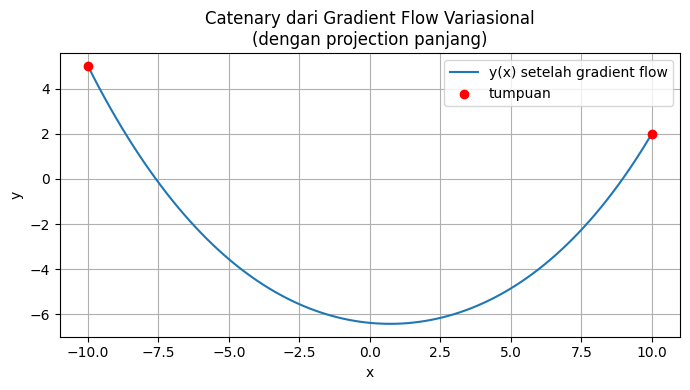

In [52]:
# ----------------- PLOT BENTUK TALI -----------------
plt.figure(figsize=(7,4))
plt.plot(x, y, label='y(x) setelah gradient flow')
plt.scatter([x[0], x[-1]], [y_left, y_right],
            color='red', zorder=5, label='tumpuan')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Catenary dari Gradient Flow Variasional\n(dengan projection panjang)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

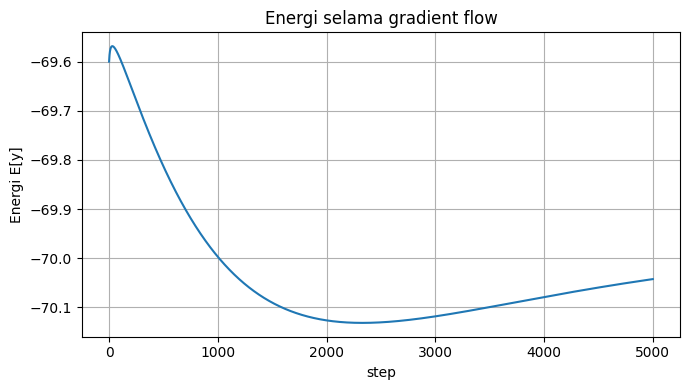

In [53]:
# ----------------- PLOT KONVERGENSI -----------------
plt.figure(figsize=(7,4))
plt.plot(history_E)
plt.xlabel('step')
plt.ylabel('Energi E[y]')
plt.title('Energi selama gradient flow')
plt.grid(True)
plt.tight_layout()
plt.show()

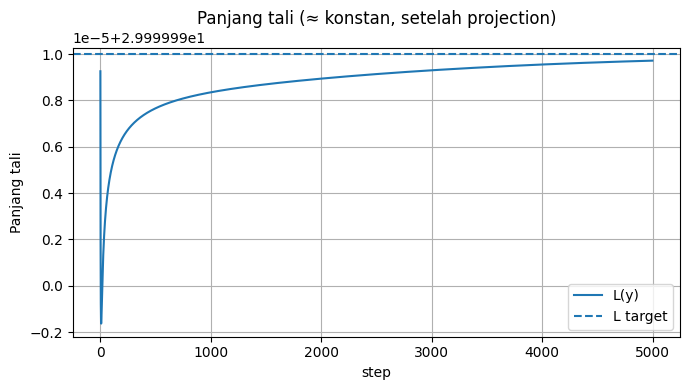

In [54]:
plt.figure(figsize=(7,4))
plt.plot(history_L, label='L(y)')
plt.axhline(L, linestyle='--', label='L target')
plt.xlabel('step')
plt.ylabel('Panjang tali')
plt.legend()
plt.title('Panjang tali (≈ konstan, setelah projection)')
plt.grid(True)
plt.tight_layout()
plt.show()

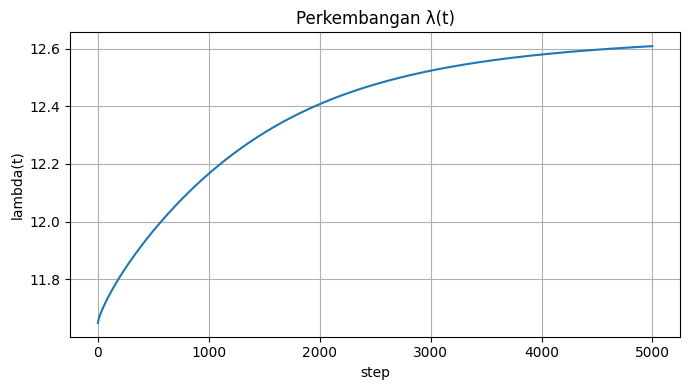

In [55]:
plt.figure(figsize=(7,4))
plt.plot(history_lambda)
plt.xlabel('step')
plt.ylabel('lambda(t)')
plt.title('Perkembangan λ(t)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Membandingkan dengan solusi analitik 
$y(x) = a \cosh\!\left(\frac{x - x_0}{a}\right) + C$

dengan error :

#### Error lokal
$e_i = y_{\text{num}, i} - y_{\text{cat}, i}$

#### RMSE — Root Mean Square Error

$\mathrm{RMSE} = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( y_{\text{num}, i} - y_{\text{cat}, i} \right)^2 }$

=== Parameter catenary analitik (diketahui) ===
a     = 6.206206
x0    = 0.622702
C     = -12.745186

=== Error numerik vs analitik ===
Max |y_num - y_cat| = 2.787215e-01
RMSE                 = 1.605165e-01


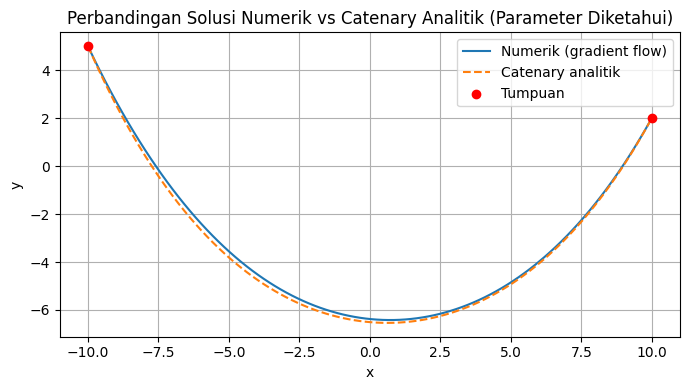

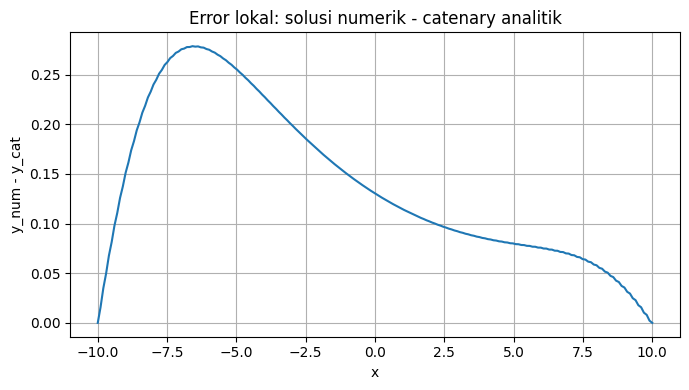

In [58]:
a_opt  = 6.206206
x0_opt = 0.622702
C_opt  = -12.745186

# Solusi catenary analitik di grid x
y_cat = a_opt * np.cosh((x - x0_opt) / a_opt) + C_opt

# Hitung error terhadap solusi numerik (jika y sudah tersedia)
diff = y - y_cat
max_err = np.max(np.abs(diff))
rmse = np.sqrt(np.mean(diff**2))

print("=== Error numerik vs analitik ===")
print(f"Max |y_num - y_cat| = {max_err:.6e}")
print(f"RMSE                 = {rmse:.6e}")

# Plot perbandingan kurva
plt.figure(figsize=(7,4))
plt.plot(x, y, label='Numerik (gradient flow)')
plt.plot(x, y_cat, '--', label='Catenary analitik')
plt.scatter([x1, x2], [y_left, y_right],
            color='red', zorder=5, label='Tumpuan')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perbandingan Solusi Numerik vs Catenary Analitik (Parameter Diketahui)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot error lokal
plt.figure(figsize=(7,4))
plt.plot(x, diff)
plt.xlabel('x')
plt.ylabel('y_num - y_cat')
plt.title('Error lokal: solusi numerik - catenary analitik')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# # ----------------------------------------------------
# # 8. BANDINGKAN DENGAN SOLUSI CATENARY ANALITIK
# # ----------------------------------------------------
# from scipy.optimize import root

# # Sistem persamaan untuk mencari parameter catenary
# # y(x) = a cosh((x - x0)/a) + C
# # Unknown: a > 0, x0. C didapat belakangan dari boundary kiri.


# def catenary_equations(vars_):
#     alpha, x0 = vars_
#     a = np.exp(alpha)  # jamin a > 0

#     # Biar singkat
#     u1 = (x1 - x0) / a
#     u2 = (x2 - x0) / a

#     # Persamaan boundary: selisih tinggi antara ujung kanan dan kiri
#     # y_right - y_left = a [cosh(u2) - cosh(u1)]
#     eq1 = (y_right - y_left) - a * (np.cosh(u2) - np.cosh(u1))

#     # Persamaan panjang tali:
#     # L = a [sinh(u2) - sinh(u1)]
#     eq2 = L - a * (np.sinh(u2) - np.sinh(u1))

#     return np.array([eq1, eq2])

# # Tebakan awal parameter
# a_guess = (x2 - x1) / 2.0
# alpha0 = np.log(abs(a_guess))
# x0_guess = 0.5 * (x1 + x2)
# guess = np.array([alpha0, x0_guess])

# sol_cat = root(catenary_equations, guess)

# if not sol_cat.success:
#     print("Peringatan: gagal menemukan parameter catenary analitik:", sol_cat.message)
# else:
#     alpha_opt, x0_opt = sol_cat.x
#     a_opt = np.exp(alpha_opt)

#     # Hitung C dari boundary kiri:
#     u1 = (x1 - x0_opt) / a_opt
#     C_opt = y_left - a_opt * np.cosh(u1)

#     # Solusi catenary analitik di grid x
#     y_cat = a_opt * np.cosh((x - x0_opt) / a_opt) + C_opt

#     # Hitung error
#     diff = y - y_cat
#     max_err = np.max(np.abs(diff))
#     rmse = np.sqrt(np.mean(diff**2))

#     print("=== Parameter catenary analitik ===")
#     print(f"a     = {a_opt:.6f}")
#     print(f"x0    = {x0_opt:.6f}")
#     print(f"C     = {C_opt:.6f}")
#     print()
#     print("=== Error numerik vs analitik ===")
#     print(f"Max |y_num - y_cat| = {max_err:.6e}")
#     print(f"RMSE                 = {rmse:.6e}")

#     # Plot perbandingan kurva
#     plt.figure(figsize=(7,4))
#     plt.plot(x, y, label='Numerik (gradient flow)')
#     plt.plot(x, y_cat, '--', label='Catenary analitik')
#     plt.scatter([x1, x2], [y_left, y_right],
#                 color='red', zorder=5, label='Tumpuan')
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.title('Perbandingan Solusi Numerik vs Catenary Analitik')
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     # Plot error sebagai fungsi x
#     plt.figure(figsize=(7,4))
#     plt.plot(x, diff)
#     plt.xlabel('x')
#     plt.ylabel('y_num - y_cat')
#     plt.title('Error lokal: solusi numerik - catenary analitik')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
